# Fundamentals of Data Analysis - Project

# Introduction
This document contains my research and data analysis of the Tips Data Set using the Python programming language.

## Data Set Information

### About This Data Set
According to Eargle (2016) this data set appeared in a collection of case studies "Practical Data Analysis: Case Studies in Business Statistics, Bryant & Smith 1995". The data set consists of details of 244 tips which were recorded by a waiter which he received over while working in one restaurant. The waiter recorded the following details of each tip received:

Details:
* total bill in dollars 
* tip in dollars
* sex of the bill payer - i.e. Male or Female
* whether there were any smokers in the party - i.e Yes or No
* day of the week - i.e. Thur, Fri, Sat, Sun 
* time of day - ie Lunch or Dinner
* size of the party

## Loading Data

In [64]:
# Import Pandas library as pd
import pandas as pd
# Load the tips dataset from a URL using read_csv function into dataframe called df
# adapted from https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python and McLoughlin (2019)
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")
# Display the dataframe
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [65]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### Format
The data set is a comma-separated values (csv) file with 244 records (rows of data) and 7 fields (columns) named "total_bill","tip","sex","smoker","day","time","size". CSV is a simple file format used to store tabular data, such as a spreadsheet or database. Files in the CSV format can be imported to and exported from programs that store data in tables, such as Microsoft Excel or OpenOffice Calc (Computer Hope, 2018).

Each record (row of data) is located on a separate line, delimited by a line break.
The first line of the file is the header line. The header line contains the names of the 7 fields: "total_bill","tip","sex","smoker","day","time","size".
The fields of data in the header line and each record (row) are delimited with a comma. Each row or data is indexed, the index is shown in the column on the left, but the index is not part of the dataset itself.

The first thing I notice is that the column names are confusing, so I decided to clean them up

In [66]:
# rename the columns
df = df.rename(columns={'total_bill': 'Total Bill', 'tip': 'Tip','sex': 'Gender', 'smoker': 'Smoker', 'day': 'Day', 'time': 'Mealtime', 'size': 'Party Size'})
# Displays first five rows and the column names 
df.head()

,Total Bill,Tip,Gender,Smoker,Day,Mealtime,Party Size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Modify Dataset
In the US, it is expected to tip 15 to 20% of the total bill. The tip % is not shown in the dataset, so I decided to add a column to show the tip as a percentage of the total bill.

In [67]:
# Create a new column in dataframe called tip% which is calcualted by dividing value in tip column by value in total bill column
#Solution adapted from https://stackoverflow.com/a/36619736
df['Tip%'] = df['Tip']/df['Total Bill']
df.head()

,Total Bill,Tip,Gender,Smoker,Day,Mealtime,Party Size,Tip%
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


### Summary Statistics

In [68]:
# Display summary statistics
# Adapted from https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python
df.describe()

,Total Bill,Tip,Party Size,Tip%
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


#### Interpretation of Results
* The mean value for total_bill is 19.785943, when you compare this value with the median value 17.795. Glen (2014) states that if the mean is greater than the median, the distribution is right-skewed (positively skewed). To investigate this further, I will plot the distribution to see whether this positive skewness is significant.
* The mean value for tip is 2.998279, when you compare this value with the median value 2.90, it suggests that the distribution is normal.
* The mean value for size is 2.569672, when you compare this value with the median value 2, it suggests that the distribution is also positively skewed and further investigation is needed.

In [69]:
# Display Summary Statistics for time = Dinner
# Adapted from McLoughlin (2019) 
(df.loc[df.loc[:, 'Mealtime'] == 'Dinner']).describe()

,Total Bill,Tip,Party Size,Tip%
count,176.000000,176.000000,176.000000,176.000000
mean,20.797159,3.102670,2.630682,0.159518
std,9.142029,1.436243,0.910241,0.067477
min,3.070000,1.000000,1.000000,0.035638
25%,14.437500,2.000000,2.000000,0.123192
50%,18.390000,3.000000,2.000000,0.155400
75%,25.282500,3.687500,3.000000,0.188209
max,50.810000,10.000000,6.000000,0.710345


In [70]:
# Display Summary Statistics for time = Lunch
# Adapted from McLoughlin (2019)
(df.loc[df.loc[:, 'Mealtime'] == 'Lunch']).describe()

,Total Bill,Tip,Party Size,Tip%
count,68.000000,68.000000,68.000000,68.000000
mean,17.168676,2.728088,2.411765,0.164128
std,7.713882,1.205345,1.040024,0.040242
min,7.510000,1.250000,1.000000,0.072961
25%,12.235000,2.000000,2.000000,0.139147
50%,15.965000,2.250000,2.000000,0.154084
75%,19.532500,3.287500,2.000000,0.193917
max,43.110000,6.700000,6.000000,0.266312


## Group By Operations

By using Pandas group function it is possible to investigate whether the mean tip values change much depending on the attributes. So I decided to investigate the data set by using the following groupings.
* sex of the bill payer - i.e. Male or Female
* whether there were any smokers in the party - i.e Yes or No
* day of the week - i.e. Thur, Fri, Sat, Sun
* time of day - ie Lunch or Dinner
* size of the party
I grouped attributes in pairs to make it more efficient to review the data set to identify results which might lead to further investigation later.


In [71]:
# Investigate if there in much difference in tips by sex and whether there was a smoker in the party or not
means1 = df.groupby(['Gender', 'Smoker']).mean()
means1

Total Bill       Tip  Party Size      Tip%
Gender Smoker                                            
Female No       18.105185  2.773519    2.592593  0.156921
       Yes      17.977879  2.931515    2.242424  0.182150
Male   No       19.791237  3.113402    2.711340  0.160669
       Yes      22.284500  3.051167    2.500000  0.152771

In [72]:
means2 = df.groupby(['Day', 'Mealtime']).mean()
means2


Total Bill       Tip  Party Size      Tip%
Day  Mealtime                                            
Fri  Dinner     19.663333  2.940000    2.166667  0.158916
     Lunch      12.845714  2.382857    2.000000  0.188765
Sat  Dinner     20.441379  2.993103    2.517241  0.153152
Sun  Dinner     21.410000  3.255132    2.842105  0.166897
Thur Dinner     18.780000  3.000000    2.000000  0.159744
     Lunch      17.664754  2.767705    2.459016  0.161301

In [73]:
counts = df.groupby(['Day', 'Mealtime']).count()
counts

Total Bill  Tip  Gender  Smoker  Party Size  Tip%
Day  Mealtime                                                   
Fri  Dinner            12   12      12      12          12    12
     Lunch              7    7       7       7           7     7
Sat  Dinner            87   87      87      87          87    87
Sun  Dinner            76   76      76      76          76    76
Thur Dinner             1    1       1       1           1     1
     Lunch             61   61      61      61          61    61

In [74]:
means_size = df.groupby('Party Size').mean()
means_size

,Total Bill,Tip,Tip%
Party Size,,,
1,7.242500,1.437500,0.217292
2,16.448013,2.582308,0.165719
3,23.277632,3.393158,0.152157
4,28.613514,4.135405,0.145949
5,30.068000,4.028000,0.141495
6,34.830000,5.225000,0.156229


In [75]:
means_day_size = df.groupby(['Day','Party Size']).mean()
means_day_size

Total Bill       Tip      Tip%
Day  Party Size                                
Fri  1             8.580000  1.920000  0.223776
     2            16.321875  2.644375  0.168693
     3            15.980000  3.000000  0.187735
     4            40.170000  4.730000  0.117750
Sat  1             5.160000  1.000000  0.231832
     2            16.837170  2.517547  0.155289
     3            25.509444  3.797778  0.151439
     4            29.876154  4.123846  0.138289
     5            28.150000  3.000000  0.106572
Sun  2            17.560000  2.816923  0.180870
     3            22.184000  3.120667  0.152662
     4            26.688333  4.087778  0.153168
     5            27.000000  4.046667  0.159839
     6            48.170000  5.000000  0.103799
Thur 1            10.070000  1.830000  0.181728
     2            15.156875  2.442500  0.163935
     3            19.160000  2.692500  0.144599
     4            29.950000  4.218000  0.145515
     5            41.190000  5.000000  0.121389
     6            30.383333  5.300000  0.173706

## Hierarchical Indexing

In [76]:
# 
# Adapted from McKinney (2019)
means_day_size.stack().unstack('Party Size')

Party Size               1          2          3          4          5  \
Day                                                                      
Fri  Total Bill   8.580000  16.321875  15.980000  40.170000        NaN   
     Tip          1.920000   2.644375   3.000000   4.730000        NaN   
     Tip%         0.223776   0.168693   0.187735   0.117750        NaN   
Sat  Total Bill   5.160000  16.837170  25.509444  29.876154  28.150000   
     Tip          1.000000   2.517547   3.797778   4.123846   3.000000   
     Tip%         0.231832   0.155289   0.151439   0.138289   0.106572   
Sun  Total Bill        NaN  17.560000  22.184000  26.688333  27.000000   
     Tip               NaN   2.816923   3.120667   4.087778   4.046667   
     Tip%              NaN   0.180870   0.152662   0.153168   0.159839   
Thur Total Bill  10.070000  15.156875  19.160000  29.950000  41.190000   
     Tip          1.830000   2.442500   2.692500   4.218000   5.000000   
     Tip%         0.181728   0.163935   0.144599   0.145515   0.121389   

Party Size               6  
Day                         
Fri  Total Bill        NaN  
     Tip               NaN  
     Tip%              NaN  
Sat  Total Bill        NaN  
     Tip               NaN  
     Tip%              NaN  
Sun  Total Bill  48.170000  
     Tip          5.000000  
     Tip%         0.103799  
Thur Total Bill  30.383333  
     Tip          5.300000  
     Tip%         0.173706

## Pivot Tables

In [77]:
# Create pivot table compare tips by day and mealtime and gender

# Import 'numpy' as np
import numpy as np
# create a pivot table to display mean tip by sex using days a nested index of day & time 
# Code adapted from https://towardsdatascience.com/python-for-data-science-from-scratch-part-ii-e4dd4b943aba
mean_tips = pd.pivot_table(df,values = 'Tip', index=['Day', 'Mealtime'],columns='Gender', aggfunc=np.mean)
mean_tips

Gender           Female      Male
Day  Mealtime                    
Fri  Dinner    2.810000  3.032857
     Lunch     2.745000  1.900000
Sat  Dinner    2.801786  3.083898
Sun  Dinner    3.367222  3.220345
Thur Dinner    3.000000       NaN
     Lunch     2.561935  2.980333

## Plots

#### Histogram
Create a simple histogram to show the distribution of tip values and tip %.

<function matplotlib.pyplot.show(*args, **kw)>

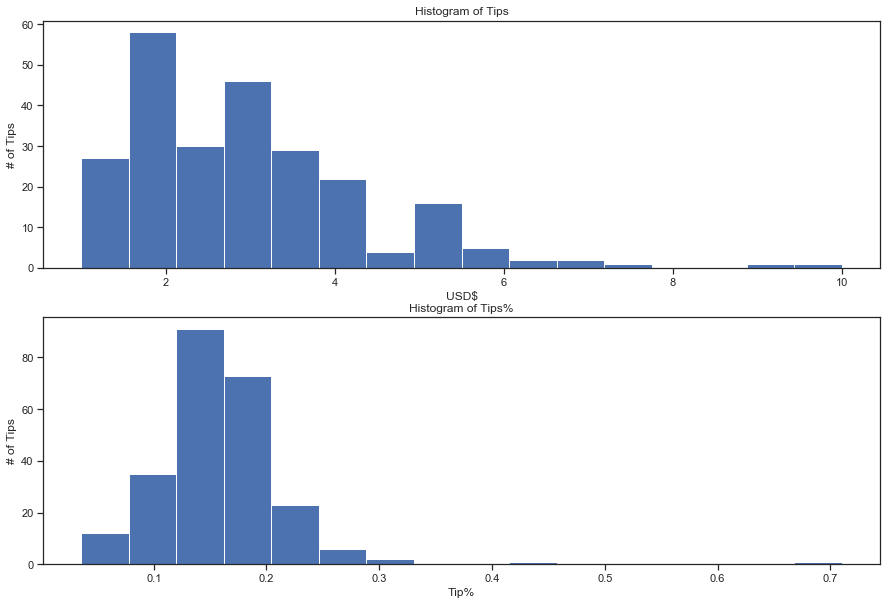

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
# Resize Plot to creates a figure with 15 (width) x 10 (height) inches - Adapted from https://stackoverflow.com/a/36368418
plt.figure(figsize=(15,10))
# Use subplot to compare the distribution of Total_Bill and Tips adapted from https://www.kaggle.com/lalitharajesh/iris-dataset-exploratory-data-analysis/data
# Plot first subplot on first row of grid which contains grid 2 rows x 1 columns
plt.subplot(2,1,1)
x = (df.loc[:, 'Tip'])
plt.hist(x, bins=16)
plt.xlabel('USD$')
plt.ylabel('# of Tips')
plt.title(r'Histogram of Tips')
# Plot 2nd subplot on second row of grid which contains 2 rows x 1 column 
plt.subplot(2,1,2)
y = (df.loc[:, 'Tip%'])
plt.hist(y, bins=16)
plt.xlabel('Tip%')
plt.ylabel('# of Tips')
plt.title(r'Histogram of Tips%')
plt.show

##### Interpretation of Results
* A quick look at the histogram suggests that that there may be some outliers in the dataset, where the tip% is greater than 40%

In [79]:
# Adapted from McLoughlin (2019)
# create a dataframe called outlier by extracting rows from the df dataframe where the values in Tip% column are greater than 0.4
outlier = (df.loc[df.loc[:, 'Tip%'] > 0.4])
# Display outlier array
outlier
# Display 2 rows of data which may contain potential outliers

,Total Bill,Tip,Gender,Smoker,Day,Mealtime,Party Size,Tip%
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667


In [80]:
# 
df2 = df.drop([df.index[172],df.index[178]])
df2.describe()

,Total Bill,Tip,Party Size,Tip%
count,242.000000,242.000000,242.000000,242.000000
mean,19.879835,2.985248,2.574380,0.157474
std,8.878018,1.380868,0.953615,0.047169
min,3.070000,1.000000,1.000000,0.035638
25%,13.397500,2.000000,2.000000,0.128538
50%,17.815000,2.855000,2.000000,0.154084
75%,24.222500,3.507500,3.000000,0.189956
max,50.810000,10.000000,6.000000,0.325733


##### Interpretation of Results
* A quick look at the histogram suggests that that there may be some outliers in the dataset, where the tip% is greater than 40%

## Relationships & Correlations

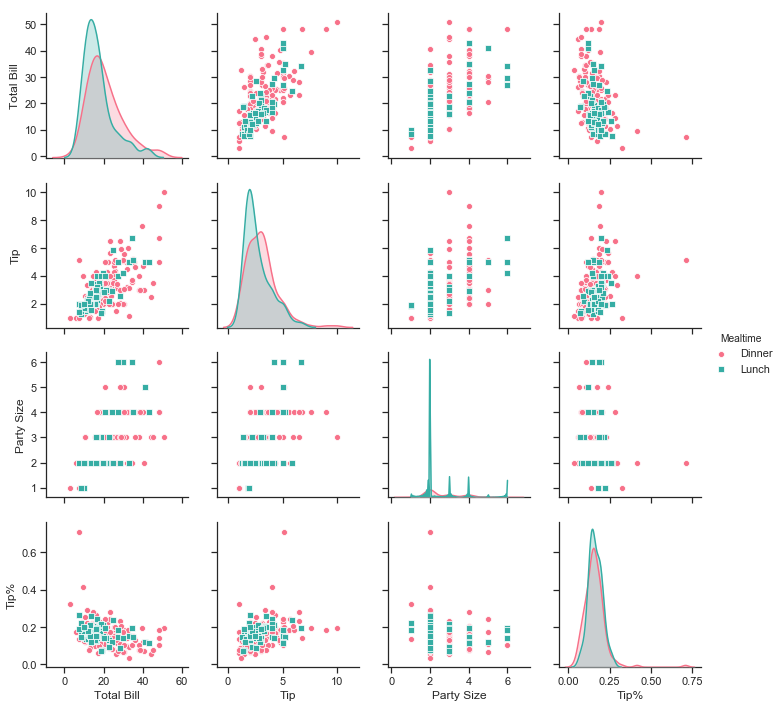

In [81]:
# Import Seaborn Library 
# adapted from https://www.datacamp.com/community/tutorials/seaborn-python-tutorial#load
import seaborn as sns
# Seaborn does not have a default style, instead it comes with 5 preset styles, which must be called
# I am using seaborn themes: ticks, as it is commonly used to give extra structure to the plots https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set(style="ticks")
# Construct scatterplot using pairplot function - adapted from https://seaborn.pydata.org/generated/seaborn.pairplot.html
# Hue is used to display lunch and Dinner in a different color (Series = "Mealtime").
# Palette ="husl" used to change color palette to husl instead of default. ref: https://seaborn.pydata.org/tutorial/color_palettes.html
# markers=["o", "s", "D"] are used to display different markers for each level of the hue variable:
sns.pairplot(df, hue='Mealtime', palette="husl", markers=["o", "s"])

### Categorical Scatterplot

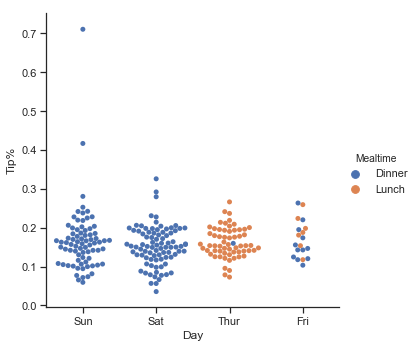

In [106]:
sns.catplot(x='Day', y='Tip%', hue='Mealtime', kind="swarm",data=df);

#### Interpreation of Results
* The swarmplot shows the shift pattern of the waiter. The waiter is more likely to work the lunchtime shift on Thursdays and , and dinner shift on the weekends.
* It is hard to see a correlation between Tip% and Day or Mealtime

## References
   1. Eargle, D (2016) *Data Mining Assignment – Tips* [Online] Available at:https://daveeargle.com/assignments/data-mining/restaurant-tip-ratios.docx [Accessed 19 Oct 2019]
   1. Bryant, P. G. and Smith, M (1995) *Practical Data Analysis: Case Studies in Business Statistics* Homewood, IL: Richard D. Irwin Publishing.
   1. Waskom, M (2014) *seaborn-data* [Online] Available at:https://github.com/mwaskom/seaborn-data/blob/master/tips.csv [Accessed 18 Oct 2019]
   2. Computer Hope (2018) *How To Create A CSV File* [Online] Available at: https://www.computerhope.com/jargon/n/newline.htm [Accessed 1 April 2019].
   3. Glen, S (2014) *Pearson Mode Skewness* [Online] Available at:https://www.statisticshowto.datasciencecentral.com/pearson-mode-skewness/ [Accessed 18 Oct 2019]
   4. McLoughlin, I (2019) *Descriptive Statistics and Plots with Pandas* [Online] Available at:https://web.microsoftstream.com/video/ecc9ce4a-c6f5-4c50-a4f4-29116fc21b81?referrer=https:%2F%2Flearnonline.gmit.ie%2Fcourse%2Fview.php%3Fid%3D689 [Accessed 18 Oct 2019]
   1. McKinney, W (2019) *Wes McKinney: pandas in 10 minutes | Walkthrough* [Online] Available at:https://www.youtube.com/watch?foo=bar&v=_T8LGqJtuGc [Accessed 19 Oct 2019]
   1. McKinney, W (2012) *Python for Data Analysis* 1st Ed. O’Reilly Media, Inc.
   1. Haunschmid, V (2017) *How to make inline plots in Jupyter Notebook larger?* [Online] Available at:https://stackoverflow.com/a/36368418 [Accessed 26 Oct 2019]